In [1]:
# multiclass classification
import pandas as pd
import xgboost
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score, train_test_split
import numpy as np
import matplotlib.pyplot as plt
import itertools
from sklearn.externals import joblib
from xgboost import plot_importance

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

/home/dan/.local/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
# load data
data = pd.read_csv('bigdata.csv')
#data = data[['open','close','high', 'low', 'SEMA', 'LEMA', 'EMACD','TM']]
#data = (data - data.mean()) / (data.max() - data.min())
print(data)
dataset = data.values
# split data into X and y
X = dataset[:,2:22]
Y = dataset[:,24]
label_encoder = LabelEncoder()
label_encoder = label_encoder.fit(Y)
Y = label_encoder.transform(Y)
print("Transforming Y...")
seed = 7
test_size = 0.33
print(data.head())

        Unnamed: 0         RateDateTime     open     high      low    close  \
0                1  2017-01-02 02:01:00  1.05209  1.05209  1.05177  1.05179   
1                2  2017-01-02 02:02:00  1.05177  1.05198  1.05177  1.05178   
2                3  2017-01-02 02:03:00  1.05188  1.05200  1.05188  1.05200   
3                4  2017-01-02 02:04:00  1.05196  1.05204  1.05196  1.05203   
4                6  2017-01-02 02:06:00  1.05196  1.05204  1.05196  1.05204   
5                7  2017-01-02 02:07:00  1.05205  1.05210  1.05205  1.05209   
6                8  2017-01-02 02:08:00  1.05210  1.05210  1.05209  1.05209   
7                9  2017-01-02 02:09:00  1.05208  1.05209  1.05208  1.05209   
8               10  2017-01-02 02:10:00  1.05208  1.05211  1.05207  1.05209   
9               11  2017-01-02 02:11:00  1.05212  1.05214  1.05211  1.05214   
10              12  2017-01-02 02:12:00  1.05213  1.05214  1.05213  1.05214   
11              13  2017-01-02 02:13:00  1.05209  1.

Fitting model ...
Model complete..
Predicting new values..
Accuracy: 95.53%
Confusion matrix, without normalization
[[46443   846]
 [ 1746  8982]]


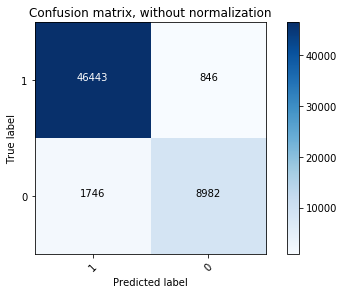

In [3]:
#X_train, X_test, y_train, y_test = train_test_split(X, label_encoded_y, test_size=test_size, random_state=seed)
train, test, train_labels, test_labels = train_test_split(X, Y, test_size=test_size, random_state=seed)
# fit model no training data
model = xgboost.XGBClassifier(max_depth=10,
                min_child_weight=2,
                subsample=.6,
                colsample_bytree=.6,
                n_estimators=250,
                learning_rate=.9)
print('Fitting model ...')
model.fit(train, train_labels)
print('Model complete..')
joblib.dump(model, 'filename3.pkl')
# make predictions for test data
print('Predicting new values..')
y_pred = model.predict(test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(test_labels, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

# Compute confusion matrix
cnf_matrix = confusion_matrix(test_labels, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
class_names = [1,0]
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')
plt.show()

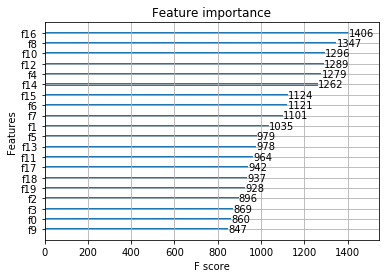

In [4]:
plot_importance(model)
plt.show()

In [5]:
data = pd.read_csv('bigdata2.csv', header=0)
# data = (data - data.mean()) / (data.max() - data.min())
dataset = data.values
# split data into X and y
X = dataset[:,2:22]
Y = dataset[:,24]
label_encoder = LabelEncoder()
label_encoder = label_encoder.fit(Y)
Y = label_encoder.transform(Y)
print(Y)
print(X)
print ("test error:")
pred_test = model.predict(X)
print(np.sqrt(np.mean((pred_test - Y)**2)))

[0 0 0 ..., 0 0 0]
[[1.14042 1.14057 1.14042 ..., 1.14042 1.14057 1.14042]
 [1.14057 1.14063 1.14056 ..., 1.14043875 1.1405775 1.1404375]
 [1.1406399999999999 1.1406399999999999 1.14063 ..., 1.14047375 1.14058925
  1.14047075]
 ..., 
 [1.16769 1.16777 1.1676 ..., 1.1675171057424296 1.1676014087612914
  1.1674280427779635]
 [1.1677600000000001 1.16777 1.1677 ..., 1.1675117278768086
  1.1675969680905274 1.167429520433262]
 [1.1677799999999998 1.16788 1.1677600000000001 ..., 1.1675281426536297
  1.1676198098968191 1.1674585993491533]]
test error:
0.582601538844


Confusion matrix, without normalization
[[12546  4215]
 [ 2639   793]]


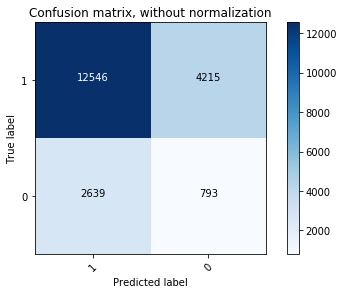

In [6]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(Y, pred_test)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
class_names = [1,0]
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')
plt.show()

In [7]:
# evaluate predictions
accuracy = accuracy_score(Y, pred_test)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 66.06%
